# Capstone Project 1: MuscleHub AB Test

## Step 1: Get started with SQL

Like most businesses, Janet keeps her data in a SQL database.  Normally, you'd download the data from her database to a csv file, and then load it into a Jupyter Notebook using Pandas.

For this project, you'll have to access SQL in a slightly different way.  You'll be using a special Codecademy library that lets you type SQL queries directly into this Jupyter notebook.  You'll have pass each SQL query as an argument to a function called `sql_query`.  Each query will return a Pandas DataFrame.  Here's an example:

In [7]:
# This import only needs to happen once, at the beginning of the notebook
from codecademySQL import sql_query

In [2]:
# Here's an example of a query that just displays some data
sql_query('''
SELECT *
FROM visits
LIMIT 5
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [3]:
# Here's an example where we save the data to a DataFrame
df = sql_query('''
SELECT *
FROM applications
LIMIT 5
''')

## Step 2: Get your dataset

Let's get started!

Janet of MuscleHub has a SQLite database, which contains several tables that will be helpful to you in this investigation:
- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

Use the space below to examine each table.

In [8]:
# Examine visits here
from codecademySQL import sql_query
sql_query('''
SELECT *
FROM visits
LIMIT 5
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [5]:
# Examine fitness_tests here
sql_query('''
SELECT *
FROM fitness_tests
LIMIT 5
''')

,index,first_name,last_name,email,gender,fitness_test_date
0,0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [6]:
# Examine applications here
sql_query('''
SELECT *
FROM applications
LIMIT 5
''')

,index,first_name,last_name,email,gender,application_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [7]:
# Examine purchases here
sql_query('''
SELECT *
FROM purchases
LIMIT 5
''')

,index,first_name,last_name,email,gender,purchase_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


We'd like to download a giant DataFrame containing all of this data.  You'll need to write a query that does the following things:

1. Not all visits in  `visits` occurred during the A/B test.  You'll only want to pull data where `visit_date` is on or after `7-1-17`.

2. You'll want to perform a series of `LEFT JOIN` commands to combine the four tables that we care about.  You'll need to perform the joins on `first_name`, `last_name`, and `email`.  Pull the following columns:


- `visits.first_name`
- `visits.last_name`
- `visits.gender`
- `visits.email`
- `visits.visit_date`
- `fitness_tests.fitness_test_date`
- `applications.application_date`
- `purchases.purchase_date`

Save the result of this query to a variable called `df`.

Hint: your result should have 5004 rows.  Does it?

In [9]:
df = sql_query('''
SELECT visits.first_name,
       visits.last_name,
       visits.visit_date,
       fitness_tests.fitness_test_date,
       applications.application_date,
       purchases.purchase_date
FROM visits
LEFT JOIN fitness_tests
    ON fitness_tests.first_name = visits.first_name
    AND fitness_tests.last_name = visits.last_name
    AND fitness_tests.email = visits.email
LEFT JOIN applications
    ON applications.first_name = visits.first_name
    AND applications.last_name = visits.last_name
    AND applications.email = visits.email
LEFT JOIN purchases
    ON purchases.first_name = visits.first_name
    AND purchases.last_name = visits.last_name
    AND purchases.email = visits.email
WHERE visits.visit_date >= '7-1-17'
''')


## Step 3: Investigate the A and B groups

We have some data to work with! Import the following modules so that we can start doing analysis:
- `import pandas as pd`
- `from matplotlib import pyplot as plt`

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

We're going to add some columns to `df` to help us with our analysis.

Start by adding a column called `ab_test_group`.  It should be `A` if `fitness_test_date` is not `None`, and `B` if `fitness_test_date` is `None`.

In [15]:
df['ab_test_group'] = df.fitness_test_date.apply(lambda x:'B' if pd.isna(x) else 'A')

Let's do a quick sanity check that Janet split her visitors such that about half are in A and half are in B.

Start by using `groupby` to count how many users are in each `ab_test_group`.  Save the results to `ab_counts`.

In [17]:
ab_counts = df.groupby('ab_test_group').first_name.count().reset_index()
print(ab_counts)

  ab_test_group  first_name
0             A        2504
1             B        2500


We'll want to include this information in our presentation.  Let's create a pie cart using `plt.pie`.  Make sure to include:
- Use `plt.axis('equal')` so that your pie chart looks nice
- Add a legend labeling `A` and `B`
- Use `autopct` to label the percentage of each group
- Save your figure as `ab_test_pie_chart.png`

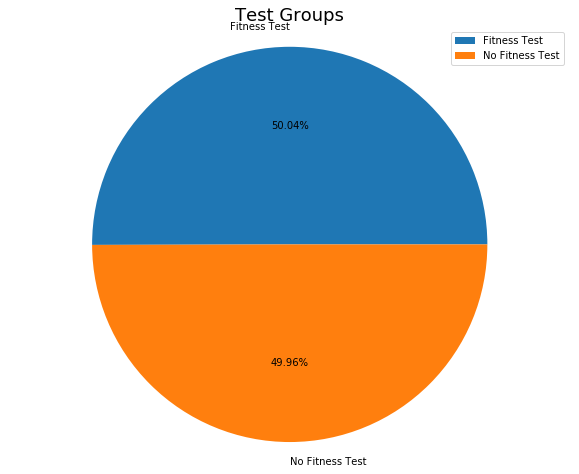

In [25]:
plt.figure(figsize=(10,8))
plt.pie(ab_counts.first_name.values, labels=['Fitness Test', 'No Fitness Test'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('Test Groups', size=18)
plt.legend()
plt.show()

## Step 4: Who picks up an application?

Recall that the sign-up process for MuscleHub has several steps:
1. Take a fitness test with a personal trainer (only Group A)
2. Fill out an application for the gym
3. Send in their payment for their first month's membership

Let's examine how many people make it to Step 2, filling out an application.

Start by creating a new column in `df` called `is_application` which is `Application` if `application_date` is not `None` and `No Application`, otherwise.

In [26]:
df['is_application'] = df.application_date.apply(lambda y: \
  'No Application' if pd.isna(y) else 'Application')

Now, using `groupby`, count how many people from Group A and Group B either do or don't pick up an application.  You'll want to group by `ab_test_group` and `is_application`.  Save this new DataFrame as `app_counts`

In [27]:
app_counts = df.groupby(['ab_test_group', 'is_application']).first_name.count().reset_index()
print(app_counts)

  ab_test_group  is_application  first_name
0             A     Application         250
1             A  No Application        2254
2             B     Application         325
3             B  No Application        2175


We're going to want to calculate the percent of people in each group who complete an application.  It's going to be much easier to do this if we pivot `app_counts` such that:
- The `index` is `ab_test_group`
- The `columns` are `is_application`
Perform this pivot and save it to the variable `app_pivot`.  Remember to call `reset_index()` at the end of the pivot!

In [28]:
app_pivot = app_counts.pivot(columns = 'is_application',
                             index = 'ab_test_group',
                             values = 'first_name')\
            .reset_index()
print(app_pivot)

is_application ab_test_group  Application  No Application
0                          A          250            2254
1                          B          325            2175


Define a new column called `Total`, which is the sum of `Application` and `No Application`.

In [31]:
app_pivot['Total'] = app_pivot.Application + app_pivot['No Application']
print(app_pivot)

is_application ab_test_group  Application  No Application  Total
0                          A          250            2254   2504
1                          B          325            2175   2500


Calculate another column called `Percent with Application`, which is equal to `Application` divided by `Total`.

In [32]:
app_pivot['Percent with Application'] = app_pivot.Application / app_pivot.Total * 1.0
print(app_pivot)

is_application ab_test_group  Application  No Application  Total  \
0                          A          250            2254   2504   
1                          B          325            2175   2500   

is_application  Percent with Application  
0                                0.09984  
1                                0.13000  


It looks like more people from Group B turned in an application.  Why might that be?

We need to know if this difference is statistically significant.

Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

In [34]:
from scipy.stats import chi2_contingency
table = [[250, 2254], [325, 2175]]
chi2, pval, dof, expected = chi2_contingency(table)
print pval

0.0009647827600722304


## Step 4: Who purchases a membership?

Of those who picked up an application, how many purchased a membership?

Let's begin by adding a column to `df` called `is_member` which is `Member` if `purchase_date` is not `None`, and `Not Member` otherwise.

In [35]:
df['is_member'] = df.purchase_date.apply(lambda z: \
                                                 'Not Member' if pd.isna(z) else 'Member')
print(df.head(10))

  first_name last_name visit_date fitness_test_date application_date  \
0        Kim    Walter     7-1-17        2017-07-03             None   
1        Tom   Webster     7-1-17        2017-07-02             None   
2     Edward     Bowen     7-1-17              None       2017-07-04   
3     Marcus     Bauer     7-1-17        2017-07-01       2017-07-03   
4    Roberta      Best     7-1-17        2017-07-02             None   
5     Joseph     Foley     7-1-17              None             None   
6     Carrie   Francis     7-1-17        2017-07-05             None   
7     Sharon   William     7-1-17              None             None   
8     Teresa     Yates     7-1-17        2017-07-02             None   
9   Salvador  Cardenas     7-1-17        2017-07-07       2017-07-06   

  purchase_date ab_test_group  is_application   is_member  
0          None             A  No Application  Not Member  
1          None             A  No Application  Not Member  
2    2017-07-04            

Now, let's create a DataFrame called `just_apps` the contains only people who picked up an application.

In [37]:
just_apps = df[df.is_application == 'Application']
print(just_apps.head(10))

    first_name last_name visit_date fitness_test_date application_date  \
2       Edward     Bowen     7-1-17              None       2017-07-04   
3       Marcus     Bauer     7-1-17        2017-07-01       2017-07-03   
9     Salvador  Cardenas     7-1-17        2017-07-07       2017-07-06   
11     Valerie     Munoz     7-1-17        2017-07-03       2017-07-05   
35     Michael     Burks     7-1-17              None       2017-07-07   
36       Clyde   Patrick     7-1-17              None       2017-07-07   
69       Sonia   Harrell    7-10-17              None       2017-07-12   
95     Marlene    Barron    7-10-17              None       2017-07-11   
106     Nelson   Dejesus    7-10-17              None       2017-07-10   
122       Lisa    Kramer    7-10-17              None       2017-07-14   

    purchase_date ab_test_group is_application   is_member  
2      2017-07-04             B    Application      Member  
3      2017-07-05             A    Application      Member  
9 

Great! Now, let's do a `groupby` to find out how many people in `just_apps` are and aren't members from each group.  Follow the same process that we did in Step 4, including pivoting the data.  You should end up with a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `member_pivot`.

In [38]:
member_counts = just_apps.groupby(['ab_test_group', 'is_member']).first_name.count().reset_index()

member_pivot = member_counts.pivot(columns = 'is_member',
                               index = 'ab_test_group',
                               values = 'first_name')\
               .reset_index()
               
#Sum totals of Member and Not Member. Then calculate the percentage
member_pivot['Total'] = member_pivot.Member + member_pivot['Not Member']

member_pivot['Percent Purchase'] = member_pivot.Member / member_pivot.Total * 1.0
print member_pivot

is_member ab_test_group  Member  Not Member  Total  Percent Purchase
0                     A     200          50    250          0.800000
1                     B     250          75    325          0.769231


It looks like people who took the fitness test were more likely to purchase a membership **if** they picked up an application.  Why might that be?

Just like before, we need to know if this difference is statistically significant.  Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

In [39]:
member_table = [[200, 50], [250, 75]]
chi2, pval_2, dof, expected = chi2_contingency(member_table)
print pval_2

0.43258646051083327


Previously, we looked at what percent of people **who picked up applications** purchased memberships.  What we really care about is what percentage of **all visitors** purchased memberships.  Return to `df` and do a `groupby` to find out how many people in `df` are and aren't members from each group.  Follow the same process that we did in Step 4, including pivoting the data.  You should end up with a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `final_member_pivot`.

In [41]:
final_member_counts = df.groupby(['ab_test_group', 'is_member']).first_name.count().reset_index()

final_member_pivot = final_member_counts.pivot(columns = 'is_member',
                               index = 'ab_test_group',
                               values = 'first_name')\
               .reset_index()

final_member_pivot['Total'] = final_member_pivot.Member + final_member_pivot['Not Member']

final_member_pivot['Percent Purchase'] = final_member_pivot.Member / final_member_pivot.Total * 1.0
print final_member_pivot

is_member ab_test_group  Member  Not Member  Total  Percent Purchase
0                     A     200        2304   2504          0.079872
1                     B     250        2250   2500          0.100000


Previously, when we only considered people who had **already picked up an application**, we saw that there was no significant difference in membership between Group A and Group B.

Now, when we consider all people who **visit MuscleHub**, we see that there might be a significant different in memberships between Group A and Group B.  Perform a significance test and check.

In [42]:
final_member_table = [[200, 2304], [250, 2250]]
chi2, pval_3, dof, expected = chi2_contingency(final_member_table)
print pval_3

0.014724114645783203


## Step 5: Summarize the acquisition funel with a chart

We'd like to make a bar chart for Janet that shows the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:
- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

Create one plot for **each** of the three sets of percentages that you calculated in `app_pivot`, `member_pivot` and `final_member_pivot`.  Each plot should:
- Label the two bars as `Fitness Test` and `No Fitness Test`
- Make sure that the y-axis ticks are expressed as percents (i.e., `5%`)
- Have a title

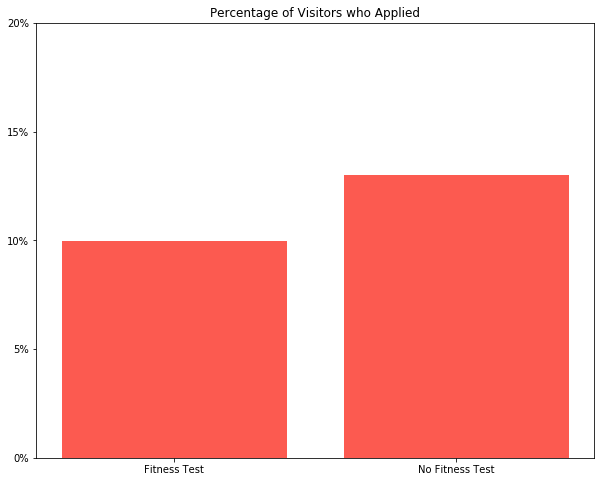

In [40]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.bar(range(len(app_pivot)),
        app_pivot['Percent with Application'].values,
        color='xkcd:Coral')
ax.set(title='Percentage of Visitors who Applied')
ax.xaxis.set(ticks=range(len(app_pivot)),
             ticklabels=['Fitness Test', 'No Fitness Test'])
ax.yaxis.set(ticks=[0, 0.05, 0.10, 0.15, 0.20],
             ticklabels=['0%', '5%', '10%', '15%', '20%'])
plt.show()

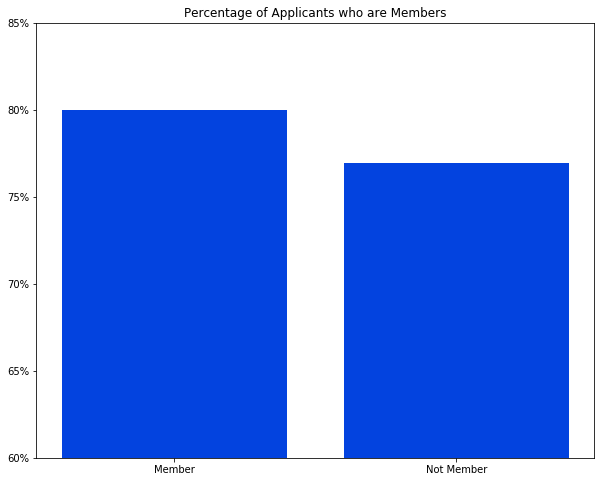

In [43]:
#Percentage of applicants who purchased a membership
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.bar(range(len(member_pivot)),
        member_pivot['Percent Purchase'].values,
        color='xkcd:blue')
ax.set(title='Percentage of Applicants who are Members',
       ylim=[0.60, 0.85])
ax.xaxis.set(ticks=range(len(member_pivot)),
             ticklabels=['Member', 'Not Member'])
ax.yaxis.set(ticks=[0.60, 0.65, 0.70, 0.75,  0.80, 0.85],
             ticklabels=['60%', '65%', '70%', '75%', '80%', '85%'])
plt.show()

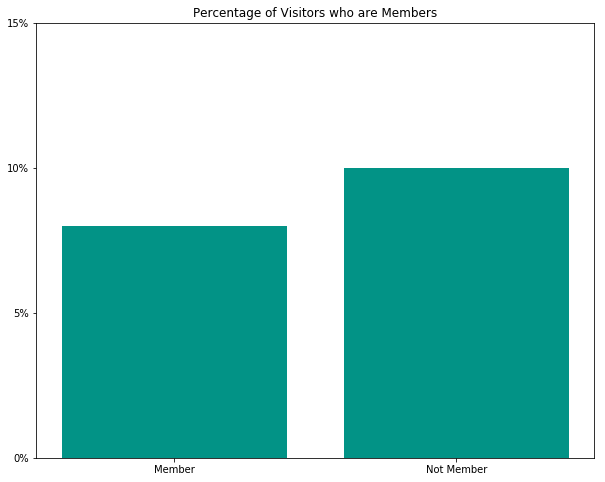

In [44]:
#Percentage of visitors who purchased a membership
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.bar(range(len(final_member_pivot)),
        final_member_pivot['Percent Purchase'].values,
        color='xkcd:teal')
ax.set(title='Percentage of Visitors who are Members',
       ylim=[0.0, 0.15])
ax.xaxis.set(ticks=range(len(final_member_pivot)),
             ticklabels=['Member', 'Not Member'])
ax.yaxis.set(ticks=[0, 0.05, 0.10, 0.15],
             ticklabels=['0%', '5%', '10%', '15%'])
plt.show()